# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Diego Partida Romero

- ID: A01641113

- My carreer: ITC


# Importing libraries

In [52]:
import numpy as np            
import pandas as pd                
import seaborn as sns              
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [53]:
df  = pd.read_csv("A01641113_X.csv")
df.head()


,id,x1,x2,x3,x4
0,0,-1.304944,-6.661701,11.418664,-2.340830
1,1,-3.989295,-1.454296,4.289474,8.478491
2,2,2.910270,-10.144525,13.084118,-11.115080
3,3,7.844845,-7.571076,4.996263,-2.934106
4,4,4.156019,-9.973699,8.564837,-5.422655


## A2 Data managment


Print the first 7 rows

In [54]:
df.head(7)

,id,x1,x2,x3,x4
0,0,-1.304944,-6.661701,11.418664,-2.340830
1,1,-3.989295,-1.454296,4.289474,8.478491
2,2,2.910270,-10.144525,13.084118,-11.115080
3,3,7.844845,-7.571076,4.996263,-2.934106
4,4,4.156019,-9.973699,8.564837,-5.422655
5,5,4.872969,-6.829932,6.647007,-2.706686
6,6,0.578575,-6.104253,11.029464,-6.076647


Print the last 4 rows

In [55]:
df.tail(4)

,id,x1,x2,x3,x4
503,503,3.622005,-7.593656,10.334765,-3.023325
504,504,2.332881,-5.596426,11.306745,-4.730497
505,505,-6.413509,-5.385964,5.192898,8.786526
506,506,2.256761,-4.373480,7.833595,-2.597609


How many rows and columns are in your data?

Use the `shape` method


In [56]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 507
Number of columns: 5


Print the name of all columns

Use the `columns` method

In [57]:
print(df.columns)


Index(['id', 'x1', 'x2', 'x3', 'x4'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [58]:
column_data_types = df.dtypes
print(column_data_types)

id      int64
x1    float64
x2    float64
x3    float64
x4    float64
dtype: object


What is the meaning of rows and columns?

Your responses here

- 1) In the context of the variable df, which is a DataFrame, the rows represent individual data points or observations

- 2) The columns represent different variables or features associated with each data point. 

- 3) Each row corresponds to a specific entry in the dataset, and each column represents a specific attribute or characteristic of that entry.

- 4) As such, we do not know what each of the variables represents, since that is not specified in the data set.

Print a statistical summary of your columns


In [59]:
df.describe()

,id,x1,x2,x3,x4
count,507.00000,507.000000,507.000000,507.000000,507.000000
mean,253.00000,0.513498,-4.962136,6.174969,2.006153
std,146.50256,3.656991,2.859974,3.686492,8.033988
min,0.00000,-7.832627,-12.159069,-3.291177,-12.365973
25%,126.50000,-2.556131,-7.188250,2.941038,-5.656199
50%,253.00000,0.417857,-4.873838,6.210145,0.052735
75%,379.50000,3.527855,-2.765378,9.325931,9.788479
max,506.00000,9.111558,1.592303,15.364864,16.136145


#### 1) What is the minumum and maximum values of each variable
- x1: Minimum = -7.832627, Maximum = 9.111558
- x2: Minimum = -12.159069, Maximum = 1.592303
- x3: Minimum = -3.291177, Maximum = 15.364864
- x4: Minimum = -12.365973, Maximum = 16.136145


#### 2) What is the mean and standar deviation of each variable
- x1: Mean = 0.513498, Standard Deviation = 3.656991
- x2: Mean = -4.962136, Standard Deviation = 2.859974
- x3: Mean = 6.174969, Standard Deviation = 3.686492
- x4: Mean = 2.006153, Standard Deviation = 8.033988


#### 3) What the 25%, 50% and 75% represent?
- 25%: 25% of the data falls below this value (also known as the first quartile).
- 50%: 50% of the data falls below this value (also known as the median or second quartile).
- 75%: 75% of the data falls below this value (also known as the third quartile).

Rename the columns using the same name with capital letters

In [60]:
df = df.rename(columns=lambda x: x.upper())
df.head()

,ID,X1,X2,X3,X4
0,0,-1.304944,-6.661701,11.418664,-2.340830
1,1,-3.989295,-1.454296,4.289474,8.478491
2,2,2.910270,-10.144525,13.084118,-11.115080
3,3,7.844845,-7.571076,4.996263,-2.934106
4,4,4.156019,-9.973699,8.564837,-5.422655


Rename the columns to their original names

In [61]:
df = df.rename(columns=lambda x: x.lower())
df.head()

,id,x1,x2,x3,x4
0,0,-1.304944,-6.661701,11.418664,-2.340830
1,1,-3.989295,-1.454296,4.289474,8.478491
2,2,2.910270,-10.144525,13.084118,-11.115080
3,3,7.844845,-7.571076,4.996263,-2.934106
4,4,4.156019,-9.973699,8.564837,-5.422655


Use two different alternatives to get one of the columns

In [62]:
# Specified the column
column = df['x1']
print("\nSpecifying the column")
print(column.head())

# Using dot notation
column = df.x2
print("\nDot notation")
print(column.head())




Specifying the column
0   -1.304944
1   -3.989295
2    2.910270
3    7.844845
4    4.156019
Name: x1, dtype: float64

Dot notation
0    -6.661701
1    -1.454296
2   -10.144525
3    -7.571076
4    -9.973699
Name: x2, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [63]:
slice_df = df.iloc[62:73, 1:3]
print(slice_df)


          x1        x2
62  6.606713 -4.262966
63  1.064640 -2.393451
64 -5.083075 -3.702746
65 -6.572084 -3.691714
66  2.089387 -7.456513
67  3.708517 -4.161017
68  6.188688 -7.083168
69  2.958216 -9.873327
70  4.189916 -8.611243
71 -2.440328 -2.749960
72  2.370822 -8.637608


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [64]:
null_values = df[['x1', 'x2']].isnull().sum()
not_null_values = df[['x1', 'x2']].notnull().sum()

print("Null values:")
print(null_values)

print("\nNot null values:")
print(not_null_values)



Null values:
x1    0
x2    0
dtype: int64

Not null values:
x1    507
x2    507
dtype: int64


Discard the last column


In [65]:
dfNew = df.drop(columns=['x4'])
dfNew.head()

,id,x1,x2,x3
0,0,-1.304944,-6.661701,11.418664
1,1,-3.989295,-1.454296,4.289474
2,2,2.910270,-10.144525,13.084118
3,3,7.844845,-7.571076,4.996263
4,4,4.156019,-9.973699,8.564837


### Questions

Based on the previos results, provide a description of yout dataset

Your response:

Based on the previous results, the dataset contains the following variables:


## Number of Observations: 
There are 507 observations in the dataset.

## Variables:
id: This variable represents the ID or index of each observation. It ranges from 0 to 506.
x1, x2, x3, x4: These variables represent different features or attributes of the dataset. Their meanings are not explicitly provided, but based on the variable names, they could represent some measured quantities or characteristics.
df: A DataFrame with 507 rows and 5 columns (id, x1, x2, x3, x4).
column_data_types: A Series with the data types of each column in the df DataFrame.
null_values: A Series with the number of null values in the x1 and x2 columns of the df DataFrame.

## Summary Statistics:
Minimum and Maximum Values: These statistics represent the smallest and largest values observed for each variable in the dataset.
Mean: The mean (average) value of each variable indicates the central tendency of the data. For example, the mean value of x1 is approximately 0.513498.
Standard Deviation: The standard deviation measures the dispersion or spread of the values around the mean. It indicates how much variation or "noise" there is in the data. For instance, the standard deviation of x2 is approximately 3.657.






## A3 Data visualization

Plot in the same figure the histogram of two variables

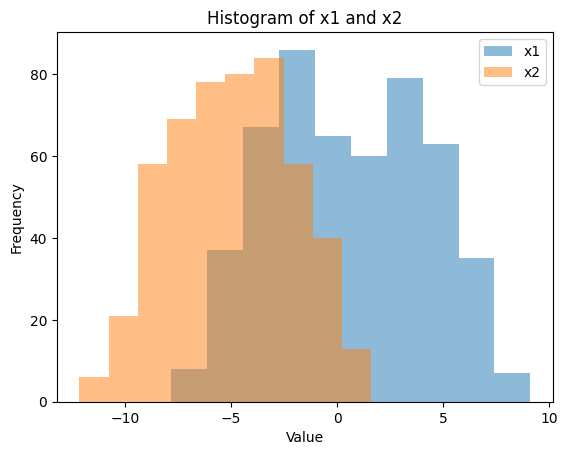

In [66]:

plt.hist(df['x1'], bins=10, alpha=0.5, label='x1')
plt.hist(df['x2'], bins=10, alpha=0.5, label='x2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x1 and x2')
plt.legend()
plt.show()


### Based on these plots, provide a description of your data:

Your response here:

- When comparing x1 and x2, a noticeable trend emerges where both variables tend to cluster around the 0-5 range. 
- Additionally, it is observable that x1 predominantly comprises positive values, whereas x2 predominantly comprises negative values.

Plot in the same figure the boxplot of two variables

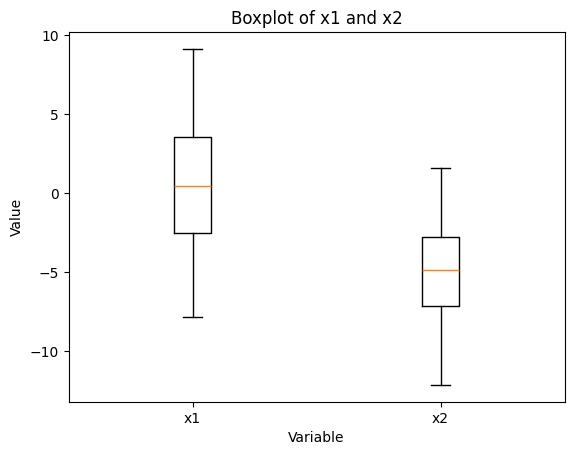

In [67]:
plt.boxplot([df['x1'], df['x2']])
plt.xticks([1, 2], ['x1', 'x2'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of x1 and x2')
plt.show()


Plot the scatter plot of two variables

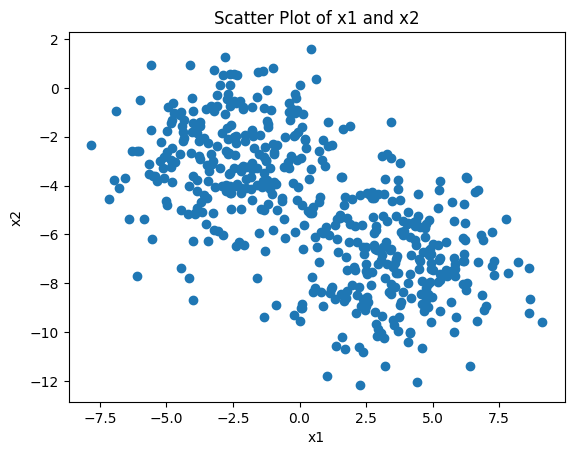

In [68]:
plt.scatter(df['x1'], df['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 and x2')
plt.show()


### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
- Thanks to the boxplot, it's evident that the values of x1 are more dispersed, ranging from approximately -6 to 9, whereas x2 values are less scattered, ranging from -12 to around positive 3.
- Regarding the scatter plot, two clusters are clearly visible at first glance.



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [69]:
# Assuming the number of clusters is 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['x1', 'x2']])

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Print the number associated with each cluster
print(df['cluster'].value_counts())

# Print the centroids
print(kmeans.cluster_centers_)

# Print the inertia metric
print(kmeans.inertia_)


cluster
1    245
0    133
2    129
Name: count, dtype: int64
[[ 1.90524596 -6.47516945]
 [-2.64960931 -2.73121307]
 [ 5.11089502 -7.64830517]]
3039.7144661929606


Add to your dataset a column with the estimated cluster to each data point

In [70]:
df['estimated_cluster'] = kmeans.predict(df[['x1', 'x2']])


Print the number associated to each cluster

In [71]:
print(df['cluster'].value_counts())

cluster
1    245
0    133
2    129
Name: count, dtype: int64


Print the centroids

In [72]:
print(kmeans.cluster_centers_)


[[ 1.90524596 -6.47516945]
 [-2.64960931 -2.73121307]
 [ 5.11089502 -7.64830517]]


Print the intertia metric

In [73]:
print(kmeans.inertia_)

3039.7144661929606


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

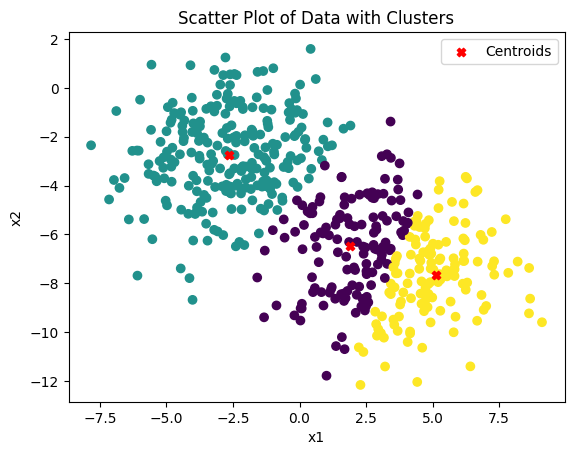

In [74]:
# Scatter plot of data points
plt.scatter(df['x1'], df['x2'], c=df['cluster'], cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data with Clusters')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Centroids')

plt.legend()
plt.show()


### Questions

Provides a detailed description of your results

Your response:

- We can observe that the three clusters are visually separated as the points are practically non-overlapping. 
- Additionally, we can identify the center of the clusters, which is determined using K-means clustering algorithm. 
- This algorithm partitions the data into a pre-defined number of clusters by minimizing the sum of squared distances between data points and the centroid of each cluster.

## A5 Elbow plot

Compute the Elbow plot

range(1, 11)
[10905.837063527866, 3742.482235297579, 3112.105820857333, 2402.3420239196867, 1983.6393954499363, 1563.660407888223, 1431.1541439426328, 1273.257994201703, 1104.5969169190566, 1026.2828064552402]


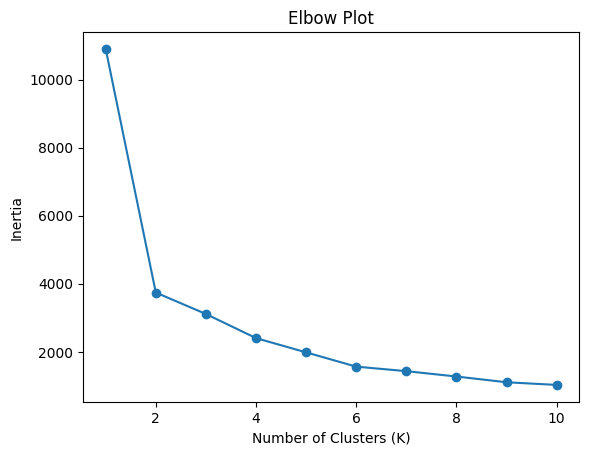

In [75]:
# Define a range of K values
k_values = range(1, 11)

# Initialize an empty list to store the inertia values
inertia_values = []

# Compute the inertia for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['x1', 'x2']])
    inertia_values.append(kmeans.inertia_)

print(k_values)    
print(inertia_values)   

# Plot the Elbow plot
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()


### Questions

What is the best number of clusters K? (argue your response)

Your response:
- Based on the elbow method, the best number of clusters K appears to be 3. This is because after 3 clusters, the rate of decrease in WCSS slows down, suggesting diminishing returns in terms of reducing intra-cluster variance. Therefore, 3 clusters seem to capture the majority of the variance in the data without overly complicating the model.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
- Yes, my initial guess was 3 clusters, and this aligns with the result obtained from the elbow method. This agreement suggests that the initial guess was reasonably accurate in capturing the underlying structure of the data.


# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

- Analizé de forma correcta las relaciones entre variables relevantes, lo que sirve de base para construir modelos bivariados. 
- Mi comprensión permite reproducir con precisión la respuesta del fenómeno investigado.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

- Logré crear los modelos utilizando las herramientas proporcionadas por el curso, logrando describir e interpretar dichos modelos.

In [77]:
# Convert to PDF
!jupyter nbconvert --to pdf D1_Evidencia.ipynb


ModuleNotFoundError: No module named 'pkg_resources'